# First Attempt to improve beyond baseline for Category prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
import gzip
from collections import defaultdict

def readGz(f):
  for l in gzip.open(f):
    yield eval(l)

In [3]:
import shutil
with open('train.json', 'rb') as f_in:
    with gzip.open('train.json.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
pairs = pd.read_csv('pairs_Purchase.txt', sep=",")

In [5]:
pairs

,reviewerID-itemID,prediction
0,U938994110-I529819131,NaN
1,U181459539-I863471064,NaN
2,U941668816-I684585522,NaN
3,U768449391-I782253949,NaN
4,U640450168-I232683472,NaN
...,...,...
27995,U337041888-I763827121,NaN
27996,U457455307-I242828364,NaN
27997,U052546714-I111529174,NaN
27998,U566804667-I857242737,NaN


## convert the json to csv for later use

##### Training

In [6]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('train.json.gz')

In [7]:
trainFeatureDf = df

In [8]:
df

,reviewTime,reviewText,helpful,reviewerID,reviewHash,categories,unixReviewTime,itemID,rating,summary,categoryID,price
0,"09 26, 2013",The model in this picture has them rolled up a...,"{'nHelpful': 0, 'outOf': 0}",U490934656,R798569390,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",1380153600,I402344648,4.0,High Waisted,0,NaN
1,"02 7, 2013","I love the look of this bra, it is what I want...","{'nHelpful': 0, 'outOf': 0}",U714157797,R436443063,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1360195200,I697650540,4.0,Beautiful but size runs small,0,NaN
2,"03 16, 2014",I am not comfortable with wearing my wedding b...,"{'nHelpful': 0, 'outOf': 0}",U507366950,R103439446,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",1394928000,I464613034,5.0,Great Alternative for Nurses,0,19.99
3,"03 10, 2014",Like the look of this top and really looks cut...,"{'nHelpful': 0, 'outOf': 0}",U307862152,R486351639,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1394409600,I559560885,2.0,One size fits all...Questionable,0,18.99
4,"07 30, 2013",I'm quite small and the XS fits me like a regu...,"{'nHelpful': 1, 'outOf': 1}",U742726598,R508664275,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",1375142400,I476005312,5.0,Great shirt,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,"01 26, 2013",Looks just like the picture and the item arriv...,"{'nHelpful': 0, 'outOf': 0}",U781794983,R285432298,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1359158400,I245323432,5.0,Cute,0,NaN
199996,"04 2, 2013",I'm a C cup and the C cup in this is way too s...,"{'nHelpful': 1, 'outOf': 1}",U151975942,R454986738,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1364860800,I990230316,1.0,Not true to Cup size.,0,NaN
199997,"09 22, 2012",I have a pair of earrings just like this (only...,"{'nHelpful': 0, 'outOf': 0}",U525354881,R088851171,"[[Clothing, Shoes & Jewelry, Jewelry: Internat...",1348272000,I037381245,4.0,"Lovely, but small",0,34.99
199998,"12 27, 2013",My granddaughter love the scarf and fit perfec...,"{'nHelpful': 0, 'outOf': 1}",U995566285,R524991477,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",1388102400,I343675670,5.0,Scarf,0,7.50


In [9]:
train = df[['reviewerID','itemID', 'rating']]

In [10]:
train = train.assign(rating=int(1))

In [11]:
train

,reviewerID,itemID,rating
0,U490934656,I402344648,1
1,U714157797,I697650540,1
2,U507366950,I464613034,1
3,U307862152,I559560885,1
4,U742726598,I476005312,1
...,...,...,...
199995,U781794983,I245323432,1
199996,U151975942,I990230316,1
199997,U525354881,I037381245,1
199998,U995566285,I343675670,1


In [12]:
train=train.rename(columns = {'rating':'purchase'})

In [13]:
train

,reviewerID,itemID,purchase
0,U490934656,I402344648,1
1,U714157797,I697650540,1
2,U507366950,I464613034,1
3,U307862152,I559560885,1
4,U742726598,I476005312,1
...,...,...,...
199995,U781794983,I245323432,1
199996,U151975942,I990230316,1
199997,U525354881,I037381245,1
199998,U995566285,I343675670,1


In [14]:
purchase_dict = {'itemID': list(train.itemID),
                'reviewerID': list(train.reviewerID),
                'purchase': list(train.purchase)}
df = pd.DataFrame(purchase_dict)

In [15]:
df

,itemID,reviewerID,purchase
0,I402344648,U490934656,1
1,I697650540,U714157797,1
2,I464613034,U507366950,1
3,I559560885,U307862152,1
4,I476005312,U742726598,1
...,...,...,...
199995,I245323432,U781794983,1
199996,I990230316,U151975942,1
199997,I037381245,U525354881,1
199998,I343675670,U995566285,1


## join test and train into a new df - then create numeric versions of user id and item id for an index to use later on

In [16]:
# fix up the test set
pairs[['reviewerID','itemID']] = pairs["reviewerID-itemID"].str.split("-",expand=True) 

In [17]:
pairs

,reviewerID-itemID,prediction,reviewerID,itemID
0,U938994110-I529819131,NaN,U938994110,I529819131
1,U181459539-I863471064,NaN,U181459539,I863471064
2,U941668816-I684585522,NaN,U941668816,I684585522
3,U768449391-I782253949,NaN,U768449391,I782253949
4,U640450168-I232683472,NaN,U640450168,I232683472
...,...,...,...,...
27995,U337041888-I763827121,NaN,U337041888,I763827121
27996,U457455307-I242828364,NaN,U457455307,I242828364
27997,U052546714-I111529174,NaN,U052546714,I111529174
27998,U566804667-I857242737,NaN,U566804667,I857242737


In [18]:
# join train and test into new df

# reviewerID
all_R = pd.DataFrame(df["reviewerID"])
test_R = pd.DataFrame(pairs["reviewerID"])

# itemID
all_I = pd.DataFrame(df["itemID"])
test_I = pd.DataFrame(pairs["itemID"])


In [19]:
all_I

,itemID
0,I402344648
1,I697650540
2,I464613034
3,I559560885
4,I476005312
...,...
199995,I245323432
199996,I990230316
199997,I037381245
199998,I343675670


In [20]:
# join them

# reviews
users = all_R.append(test_R, ignore_index=True)

# items
items = all_I.append(test_I, ignore_index=True)



In [21]:
# keep only distinct for correct index later on

# reviews
users = users.drop_duplicates()
# Items
items = items.drop_duplicates()


In [22]:
# numerical userid and itemid

# Create a numericreviewerID and itemID column
users['reviewerID2'] = users['reviewerID'].astype("category")
items['itemID2'] = items['itemID'].astype("category")
users['reviewerID2'] = users['reviewerID2'].cat.codes
items['itemID2'] = items['itemID2'].cat.codes

In [23]:
# create lookup df for after we make prediction
item_lookup = items[['itemID2', 'itemID']].drop_duplicates()
item_lookup['itemID2'] = item_lookup.itemID2.astype(str)


user_lookup = users[['reviewerID2', 'reviewerID']].drop_duplicates()
user_lookup['reviewerID2'] = user_lookup.reviewerID2.astype(str)

In [24]:
item_lookup

,itemID2,itemID
0,7898,I402344648
1,13784,I697650540
2,9177,I464613034
3,11096,I559560885
4,9409,I476005312
...,...,...
183886,17645,I887667854
185691,1496,I077575260
188496,3336,I170252582
195038,13469,I681497244


In [25]:
user_lookup

,reviewerID2,reviewerID
0,19421,U490934656
1,28237,U714157797
2,20056,U507366950
3,12149,U307862152
4,29343,U742726598
...,...,...
223957,4874,U124375305
224870,37633,U954820087
225310,30340,U767658083
225384,20346,U514988056


In [26]:
# use lookup to give numeric user and item ids to training df and test df

## train | df

# user
df2 = pd.merge(df, user_lookup, how='inner', left_on="reviewerID", right_on="reviewerID")

# item
df3 = pd.merge(df2, item_lookup, how='inner', left_on="itemID", right_on="itemID")

## test | pairs

# user
pairs2 = pd.merge(pairs, user_lookup, how='inner', left_on="reviewerID", right_on="reviewerID")

# item
pairs3 = pd.merge(pairs2, item_lookup, how='inner', left_on="itemID", right_on="itemID")



In [27]:
df3

,itemID,reviewerID,purchase,reviewerID2,itemID2
0,I402344648,U490934656,1,19421,7898
1,I402344648,U746303715,1,29477,7898
2,I402344648,U478192399,1,18917,7898
3,I402344648,U401058838,1,15783,7898
4,I402344648,U573106454,1,22652,7898
...,...,...,...,...,...
199995,I874389093,U806851106,1,31849,17406
199996,I901281801,U977764747,1,38483,17942
199997,I889608666,U259062925,1,10246,17688
199998,I889608666,U630144638,1,25015,17688


In [28]:
pairs3

,reviewerID-itemID,prediction,reviewerID,itemID,reviewerID2,itemID2
0,U938994110-I529819131,NaN,U938994110,I529819131,37023,10536
1,U867727262-I529819131,NaN,U867727262,I529819131,34192,10536
2,U181459539-I863471064,NaN,U181459539,I863471064,7190,17193
3,U484281673-I863471064,NaN,U484281673,I863471064,19169,17193
4,U348069641-I863471064,NaN,U348069641,I863471064,13701,17193
...,...,...,...,...,...,...
27995,U907072740-I014237100,NaN,U907072740,I014237100,35730,264
27996,U352767695-I788733106,NaN,U352767695,I788733106,13872,15655
27997,U387717401-I955972657,NaN,U387717401,I955972657,15247,19061
27998,U653359109-I364725474,NaN,U653359109,I364725474,25853,7176


In [29]:
# drop original ids from train and test ( for now)

# train
train = df3[["reviewerID2", "itemID2", "purchase"]]
data = df3.drop(['reviewerID', 'itemID'], axis=1)
# test

test = pairs3[["reviewerID2", "itemID2"]]



In [30]:
train

,reviewerID2,itemID2,purchase
0,19421,7898,1
1,29477,7898,1
2,18917,7898,1
3,15783,7898,1
4,22652,7898,1
...,...,...,...
199995,31849,17406,1
199996,38483,17942,1
199997,10246,17688,1
199998,25015,17688,1


In [31]:
# Create lists of all users, items and their purchase counts
users = list(np.sort(train.reviewerID2.unique()))
itemCats = list(np.sort(train.itemID2.unique()))
purchases = list(train.purchase)

In [32]:
# Get the rows and columns for our new matrix
rows = train.reviewerID2.astype(int)
cols = train.itemID2.astype(int)

In [33]:
len(users)

39239

In [34]:
len(itemCats)

19914

In [35]:
len(purchases)

200000

In [36]:
len(rows)

200000

In [37]:
len(cols)

200000

# More processing for features

In [39]:
trainFeatureDf

,reviewTime,reviewText,helpful,reviewerID,reviewHash,categories,unixReviewTime,itemID,rating,summary,categoryID,price
0,"09 26, 2013",The model in this picture has them rolled up a...,"{'nHelpful': 0, 'outOf': 0}",U490934656,R798569390,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",1380153600,I402344648,4.0,High Waisted,0,NaN
1,"02 7, 2013","I love the look of this bra, it is what I want...","{'nHelpful': 0, 'outOf': 0}",U714157797,R436443063,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1360195200,I697650540,4.0,Beautiful but size runs small,0,NaN
2,"03 16, 2014",I am not comfortable with wearing my wedding b...,"{'nHelpful': 0, 'outOf': 0}",U507366950,R103439446,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",1394928000,I464613034,5.0,Great Alternative for Nurses,0,19.99
3,"03 10, 2014",Like the look of this top and really looks cut...,"{'nHelpful': 0, 'outOf': 0}",U307862152,R486351639,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1394409600,I559560885,2.0,One size fits all...Questionable,0,18.99
4,"07 30, 2013",I'm quite small and the XS fits me like a regu...,"{'nHelpful': 1, 'outOf': 1}",U742726598,R508664275,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",1375142400,I476005312,5.0,Great shirt,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,"01 26, 2013",Looks just like the picture and the item arriv...,"{'nHelpful': 0, 'outOf': 0}",U781794983,R285432298,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1359158400,I245323432,5.0,Cute,0,NaN
199996,"04 2, 2013",I'm a C cup and the C cup in this is way too s...,"{'nHelpful': 1, 'outOf': 1}",U151975942,R454986738,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",1364860800,I990230316,1.0,Not true to Cup size.,0,NaN
199997,"09 22, 2012",I have a pair of earrings just like this (only...,"{'nHelpful': 0, 'outOf': 0}",U525354881,R088851171,"[[Clothing, Shoes & Jewelry, Jewelry: Internat...",1348272000,I037381245,4.0,"Lovely, but small",0,34.99
199998,"12 27, 2013",My granddaughter love the scarf and fit perfec...,"{'nHelpful': 0, 'outOf': 1}",U995566285,R524991477,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",1388102400,I343675670,5.0,Scarf,0,7.50


### Purchases per user

In [40]:
purchasesPerUser = trainFeatureDf['reviewerID'].value_counts()

purchasesPerUser = purchasesPerUser.reset_index()
purchasesPerUser.columns = ['reviewerID', 'purchaseCountUser']
purchasesPerUser

,reviewerID,purchaseCountUser
0,U897446633,108
1,U117785953,57
2,U761252500,57
3,U232908133,48
4,U263068464,47
...,...,...
39234,U602982502,1
39235,U482068891,1
39236,U417497829,1
39237,U111227311,1


In [41]:
purchasesPerUser['powerUser'] = np.where(purchasesPerUser['purchaseCountUser'] > 8, 1, 0) 

In [42]:
purchasesPerUser.groupby(['powerUser'])['purchaseCountUser'].sum()

powerUser
0    161319
1     38681
Name: purchaseCountUser, dtype: int64

### Average Rating by User

In [43]:
avgRatingUser = trainFeatureDf.groupby('reviewerID')['rating'].mean()

avgRatingUser = avgRatingUser.reset_index()
avgRatingUser.columns = ['reviewerID', 'avgRatingUser']
avgRatingUser

,reviewerID,avgRatingUser
0,U000005569,5.0
1,U000024709,4.0
2,U000041850,3.5
3,U000089279,5.0
4,U000131684,4.0
...,...,...
39234,U999874546,4.5
39235,U999906857,4.6
39236,U999919996,5.0
39237,U999921889,5.0


In [44]:
# join Them

userFeatures =pd.merge(purchasesPerUser, avgRatingUser, how='inner', left_on="reviewerID", right_on="reviewerID")

In [45]:
userFeatures

,reviewerID,purchaseCountUser,powerUser,avgRatingUser
0,U897446633,108,1,5.000000
1,U117785953,57,1,4.666667
2,U761252500,57,1,4.000000
3,U232908133,48,1,4.291667
4,U263068464,47,1,4.617021
...,...,...,...,...
39234,U602982502,1,0,5.000000
39235,U482068891,1,0,4.000000
39236,U417497829,1,0,5.000000
39237,U111227311,1,0,5.000000


### Purchases by Item

In [46]:
purchasesPerItem = trainFeatureDf['itemID'].value_counts()

purchasesPerItem = purchasesPerItem.reset_index()
purchasesPerItem.columns = ['itemID', 'purchaseCountItem']
purchasesPerItem

,itemID,purchaseCountItem
0,I835857013,227
1,I964877831,210
2,I431429328,196
3,I359425229,196
4,I408729378,175
...,...,...
19909,I302619354,1
19910,I300545380,1
19911,I029808566,1
19912,I681497244,1


In [47]:
pd.DataFrame.head(purchasesPerItem, n=110)

,itemID,purchaseCountItem
0,I835857013,227
1,I964877831,210
2,I431429328,196
3,I359425229,196
4,I408729378,175
...,...,...
105,I917154526,74
106,I841981701,74
107,I469783141,74
108,I092498831,74


In [48]:
purchasesPerItem['popularItem'] = np.where(purchasesPerItem['purchaseCountItem'] > 12, 1, 0) 

In [49]:
purchasesPerItem.groupby(['popularItem'])['purchaseCountItem'].sum()

popularItem
0    100316
1     99684
Name: purchaseCountItem, dtype: int64

In [50]:
hist = purchasesPerItem['purchaseCountItem'].hist(bins=30)

### Average Rating by Item

In [51]:
avgRatingItem = trainFeatureDf.groupby('itemID')['rating'].mean()

avgRatingItem = avgRatingItem.reset_index()
avgRatingItem.columns = ['itemID', 'avgRatingItem']
avgRatingItem

,itemID,avgRatingItem
0,I000024906,4.090909
1,I000030838,3.750000
2,I000253607,4.600000
3,I000310825,4.315789
4,I000350237,4.142857
...,...,...
19909,I999583554,4.500000
19910,I999658909,4.142857
19911,I999715871,4.857143
19912,I999879552,4.692308


In [52]:
# join them

itemFeatures =pd.merge(purchasesPerItem, avgRatingItem, how='inner', left_on="itemID", right_on="itemID")

In [53]:
itemFeatures

,itemID,purchaseCountItem,popularItem,avgRatingItem
0,I835857013,227,1,4.185022
1,I964877831,210,1,4.257143
2,I431429328,196,1,4.561224
3,I359425229,196,1,4.040816
4,I408729378,175,1,3.982857
...,...,...,...,...
19909,I302619354,1,0,2.000000
19910,I300545380,1,0,4.000000
19911,I029808566,1,0,5.000000
19912,I681497244,1,0,5.000000


# Map numeric IDs to the features

In [54]:
item_lookup

,itemID2,itemID
0,7898,I402344648
1,13784,I697650540
2,9177,I464613034
3,11096,I559560885
4,9409,I476005312
...,...,...
183886,17645,I887667854
185691,1496,I077575260
188496,3336,I170252582
195038,13469,I681497244


In [55]:
user_lookup

,reviewerID2,reviewerID
0,19421,U490934656
1,28237,U714157797
2,20056,U507366950
3,12149,U307862152
4,29343,U742726598
...,...,...
223957,4874,U124375305
224870,37633,U954820087
225310,30340,U767658083
225384,20346,U514988056


In [56]:
itemFeatures2 =pd.merge(itemFeatures, item_lookup, how='inner', left_on="itemID", right_on="itemID")

In [57]:
itemFeatures2

,itemID,purchaseCountItem,popularItem,avgRatingItem,itemID2
0,I835857013,227,1,4.185022,16621
1,I964877831,210,1,4.257143,19225
2,I431429328,196,1,4.561224,8481
3,I359425229,196,1,4.040816,7095
4,I408729378,175,1,3.982857,8023
...,...,...,...,...,...
19909,I302619354,1,0,2.000000,5955
19910,I300545380,1,0,4.000000,5911
19911,I029808566,1,0,5.000000,587
19912,I681497244,1,0,5.000000,13469


In [58]:
userFeatures2 =pd.merge(userFeatures, user_lookup, how='inner', left_on="reviewerID", right_on="reviewerID")

# Join item features together to make item features for MLP

In [59]:
train2 =pd.merge(train, userFeatures2, how='inner', left_on="reviewerID2", right_on="reviewerID2")

In [60]:
train3 =pd.merge(train2, itemFeatures2, how='inner', left_on="itemID2", right_on="itemID2")

In [61]:
train3

,reviewerID2,itemID2,purchase,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,19421,7898,1,U490934656,3,0,4.000000,I402344648,19,1,4.157895
1,29477,7898,1,U746303715,13,1,3.846154,I402344648,19,1,4.157895
2,18917,7898,1,U478192399,27,1,4.296296,I402344648,19,1,4.157895
3,15783,7898,1,U401058838,5,0,5.000000,I402344648,19,1,4.157895
4,22652,7898,1,U573106454,5,0,4.400000,I402344648,19,1,4.157895
...,...,...,...,...,...,...,...,...,...,...,...
199995,10994,6320,1,U278717089,6,0,5.000000,I321612122,9,0,5.000000
199996,25357,6320,1,U639364980,10,1,5.000000,I321612122,9,0,5.000000
199997,3356,6320,1,U084975813,6,0,5.000000,I321612122,9,0,5.000000
199998,32189,6320,1,U815912916,6,0,5.000000,I321612122,9,0,5.000000


# Add user and item features to pairs3

In [62]:
pairs3

,reviewerID-itemID,prediction,reviewerID,itemID,reviewerID2,itemID2
0,U938994110-I529819131,NaN,U938994110,I529819131,37023,10536
1,U867727262-I529819131,NaN,U867727262,I529819131,34192,10536
2,U181459539-I863471064,NaN,U181459539,I863471064,7190,17193
3,U484281673-I863471064,NaN,U484281673,I863471064,19169,17193
4,U348069641-I863471064,NaN,U348069641,I863471064,13701,17193
...,...,...,...,...,...,...
27995,U907072740-I014237100,NaN,U907072740,I014237100,35730,264
27996,U352767695-I788733106,NaN,U352767695,I788733106,13872,15655
27997,U387717401-I955972657,NaN,U387717401,I955972657,15247,19061
27998,U653359109-I364725474,NaN,U653359109,I364725474,25853,7176


In [63]:
pairs3a = pairs3.drop(columns=['itemID', 'reviewerID'])

In [64]:
pairs4 =pd.merge(pairs3a, userFeatures2, how='left', left_on="reviewerID2", right_on="reviewerID2")

In [65]:
pairs5 =pd.merge(pairs4, itemFeatures2, how='left', left_on="itemID2", right_on="itemID2")

In [66]:
pairs5

,reviewerID-itemID,prediction,reviewerID2,itemID2,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,U938994110-I529819131,NaN,37023,10536,U938994110,3.0,0.0,4.000000,I529819131,8.0,0.0,4.375000
1,U867727262-I529819131,NaN,34192,10536,U867727262,4.0,0.0,3.500000,I529819131,8.0,0.0,4.375000
2,U181459539-I863471064,NaN,7190,17193,U181459539,3.0,0.0,4.666667,I863471064,30.0,1.0,4.166667
3,U484281673-I863471064,NaN,19169,17193,U484281673,3.0,0.0,4.333333,I863471064,30.0,1.0,4.166667
4,U348069641-I863471064,NaN,13701,17193,U348069641,4.0,0.0,4.250000,I863471064,30.0,1.0,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,U907072740-I014237100,NaN,35730,264,U907072740,4.0,0.0,4.250000,I014237100,6.0,0.0,4.833333
27996,U352767695-I788733106,NaN,13872,15655,U352767695,5.0,0.0,4.600000,I788733106,6.0,0.0,4.833333
27997,U387717401-I955972657,NaN,15247,19061,U387717401,7.0,0.0,3.857143,I955972657,5.0,0.0,3.400000
27998,U653359109-I364725474,NaN,25853,7176,U653359109,5.0,0.0,3.800000,I364725474,14.0,1.0,4.071429


In [67]:
# fill na in pairs with mean

pairs5['purchaseCountUser'].fillna((pairs5['purchaseCountUser'].mean()), inplace=True)
pairs5['avgRatingUser'].fillna((pairs5['avgRatingUser'].mean()), inplace=True)
pairs5['purchaseCountItem'].fillna((pairs5['purchaseCountItem'].mean()), inplace=True)
pairs5['avgRatingItem'].fillna((pairs5['avgRatingItem'].mean()), inplace=True)

In [68]:
pairs5

,reviewerID-itemID,prediction,reviewerID2,itemID2,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,U938994110-I529819131,NaN,37023,10536,U938994110,3.0,0.0,4.000000,I529819131,8.0,0.0,4.375000
1,U867727262-I529819131,NaN,34192,10536,U867727262,4.0,0.0,3.500000,I529819131,8.0,0.0,4.375000
2,U181459539-I863471064,NaN,7190,17193,U181459539,3.0,0.0,4.666667,I863471064,30.0,1.0,4.166667
3,U484281673-I863471064,NaN,19169,17193,U484281673,3.0,0.0,4.333333,I863471064,30.0,1.0,4.166667
4,U348069641-I863471064,NaN,13701,17193,U348069641,4.0,0.0,4.250000,I863471064,30.0,1.0,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,U907072740-I014237100,NaN,35730,264,U907072740,4.0,0.0,4.250000,I014237100,6.0,0.0,4.833333
27996,U352767695-I788733106,NaN,13872,15655,U352767695,5.0,0.0,4.600000,I788733106,6.0,0.0,4.833333
27997,U387717401-I955972657,NaN,15247,19061,U387717401,7.0,0.0,3.857143,I955972657,5.0,0.0,3.400000
27998,U653359109-I364725474,NaN,25853,7176,U653359109,5.0,0.0,3.800000,I364725474,14.0,1.0,4.071429


# Try an MLP

In [69]:
train_x = train3[['reviewerID2', 'itemID2','purchaseCountUser', 'avgRatingUser', 'purchaseCountItem', 'avgRatingItem']]

In [70]:
train_x

,reviewerID2,itemID2,purchaseCountUser,avgRatingUser,purchaseCountItem,avgRatingItem
0,19421,7898,3,4.000000,19,4.157895
1,29477,7898,13,3.846154,19,4.157895
2,18917,7898,27,4.296296,19,4.157895
3,15783,7898,5,5.000000,19,4.157895
4,22652,7898,5,4.400000,19,4.157895
...,...,...,...,...,...,...
199995,10994,6320,6,5.000000,9,5.000000
199996,25357,6320,10,5.000000,9,5.000000
199997,3356,6320,6,5.000000,9,5.000000
199998,32189,6320,6,5.000000,9,5.000000


In [71]:
train_y = train3['purchase']

In [72]:
train3

,reviewerID2,itemID2,purchase,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,19421,7898,1,U490934656,3,0,4.000000,I402344648,19,1,4.157895
1,29477,7898,1,U746303715,13,1,3.846154,I402344648,19,1,4.157895
2,18917,7898,1,U478192399,27,1,4.296296,I402344648,19,1,4.157895
3,15783,7898,1,U401058838,5,0,5.000000,I402344648,19,1,4.157895
4,22652,7898,1,U573106454,5,0,4.400000,I402344648,19,1,4.157895
...,...,...,...,...,...,...,...,...,...,...,...
199995,10994,6320,1,U278717089,6,0,5.000000,I321612122,9,0,5.000000
199996,25357,6320,1,U639364980,10,1,5.000000,I321612122,9,0,5.000000
199997,3356,6320,1,U084975813,6,0,5.000000,I321612122,9,0,5.000000
199998,32189,6320,1,U815912916,6,0,5.000000,I321612122,9,0,5.000000


# Most important - here we create the dependent variable

## We are treating low frequency users and items as non purchases and only treating popular items and users at purchases

## This should turn the MLP into a heuristic based on this logic

In [73]:
train3['purchase'] = np.where(train3['purchaseCountItem'] > 17, 1, 
         (np.where(train3['purchaseCountUser'] > 14, 1, 0))) 


In [74]:
train3.purchase.value_counts()

0    116280
1     83720
Name: purchase, dtype: int64

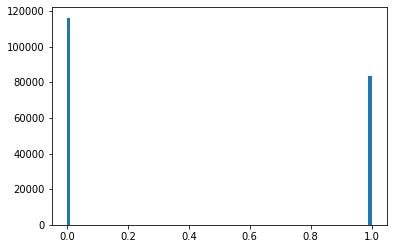

In [75]:
import matplotlib.pyplot as plt

plt.hist(train3["purchase"], bins = 100)
plt.show()

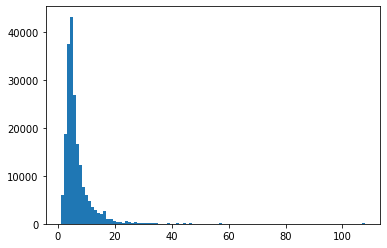

In [76]:
plt.hist(train3["purchaseCountUser"], bins = 100)
plt.show()

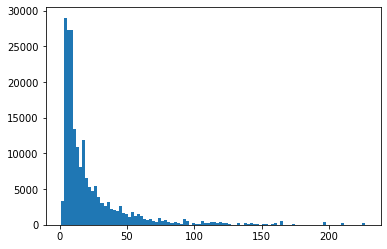

In [77]:
plt.hist(train3["purchaseCountItem"], bins = 100)
plt.show()

In [78]:
train_final = train3

In [79]:
train_final

,reviewerID2,itemID2,purchase,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,19421,7898,1,U490934656,3,0,4.000000,I402344648,19,1,4.157895
1,29477,7898,1,U746303715,13,1,3.846154,I402344648,19,1,4.157895
2,18917,7898,1,U478192399,27,1,4.296296,I402344648,19,1,4.157895
3,15783,7898,1,U401058838,5,0,5.000000,I402344648,19,1,4.157895
4,22652,7898,1,U573106454,5,0,4.400000,I402344648,19,1,4.157895
...,...,...,...,...,...,...,...,...,...,...,...
199995,10994,6320,0,U278717089,6,0,5.000000,I321612122,9,0,5.000000
199996,25357,6320,0,U639364980,10,1,5.000000,I321612122,9,0,5.000000
199997,3356,6320,0,U084975813,6,0,5.000000,I321612122,9,0,5.000000
199998,32189,6320,0,U815912916,6,0,5.000000,I321612122,9,0,5.000000


In [80]:
train_x = train_final[['purchaseCountUser', 'avgRatingUser', 'purchaseCountItem', 'avgRatingItem']]

In [81]:
train_x

,purchaseCountUser,avgRatingUser,purchaseCountItem,avgRatingItem
0,3,4.000000,19,4.157895
1,13,3.846154,19,4.157895
2,27,4.296296,19,4.157895
3,5,5.000000,19,4.157895
4,5,4.400000,19,4.157895
...,...,...,...,...
199995,6,5.000000,9,5.000000
199996,10,5.000000,9,5.000000
199997,6,5.000000,9,5.000000
199998,6,5.000000,9,5.000000


In [82]:
train_y = train_final['purchase']

In [83]:
train_x

,purchaseCountUser,avgRatingUser,purchaseCountItem,avgRatingItem
0,3,4.000000,19,4.157895
1,13,3.846154,19,4.157895
2,27,4.296296,19,4.157895
3,5,5.000000,19,4.157895
4,5,4.400000,19,4.157895
...,...,...,...,...
199995,6,5.000000,9,5.000000
199996,10,5.000000,9,5.000000
199997,6,5.000000,9,5.000000
199998,6,5.000000,9,5.000000


In [84]:
from sklearn import preprocessing

x = train_x.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_x = pd.DataFrame(x_scaled)

In [85]:
train_x

,0,1,2,3
0,-0.706419,-0.368030,-0.143463,-0.170799
1,1.139353,-0.609265,-0.143463,-0.170799
2,3.723433,0.096569,-0.143463,-0.170799
3,-0.337265,1.199992,-0.143463,-0.170799
4,-0.337265,0.259178,-0.143463,-0.170799
...,...,...,...,...
199995,-0.152688,1.199992,-0.489565,1.701620
199996,0.585621,1.199992,-0.489565,1.701620
199997,-0.152688,1.199992,-0.489565,1.701620
199998,-0.152688,1.199992,-0.489565,1.701620


In [86]:
train_y

0         1
1         1
2         1
3         1
4         1
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: purchase, Length: 200000, dtype: int32

# Build the MLP

In [87]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=0.00001, learning_rate = 'adaptive', # 
                    # hidden_layer_sizes=(100,),
                    hidden_layer_sizes=(8,8,2,),
                    max_iter=400,
                    random_state=1)

clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 2), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
test_x = pairs5[['purchaseCountUser', 'avgRatingUser', 'purchaseCountItem', 'avgRatingItem']]

In [89]:
test_x

,purchaseCountUser,avgRatingUser,purchaseCountItem,avgRatingItem
0,3.0,4.000000,8.0,4.375000
1,4.0,3.500000,8.0,4.375000
2,3.0,4.666667,30.0,4.166667
3,3.0,4.333333,30.0,4.166667
4,4.0,4.250000,30.0,4.166667
...,...,...,...,...
27995,4.0,4.250000,6.0,4.833333
27996,5.0,4.600000,6.0,4.833333
27997,7.0,3.857143,5.0,3.400000
27998,5.0,3.800000,14.0,4.071429


In [90]:
# fill na in pairs with mean

test_x['purchaseCountUser'].fillna((test_x['purchaseCountUser'].mean()), inplace=True)
test_x['avgRatingUser'].fillna((test_x['avgRatingUser'].mean()), inplace=True)
test_x['purchaseCountItem'].fillna((test_x['purchaseCountItem'].mean()), inplace=True)
test_x['avgRatingItem'].fillna((test_x['avgRatingItem'].mean()), inplace=True)

C:\Users\joshd\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
xt = test_x.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()  # MinMaxScaler()
xt_scaled = min_max_scaler.fit_transform(xt)
test_x = pd.DataFrame(xt_scaled)

In [92]:
test_x

,0,1,2,3
0,-0.558924,-0.343545,-0.350258,0.284237
1,-0.334109,-1.077737,-0.350258,0.284237
2,-0.558924,0.635378,0.605082,-0.134325
3,-0.558924,0.145917,0.605082,-0.134325
4,-0.334109,0.023552,0.605082,-0.134325
...,...,...,...,...
27995,-0.334109,0.023552,-0.437108,1.205075
27996,-0.109293,0.537486,-0.437108,1.205075
27997,0.340337,-0.553314,-0.480532,-1.674635
27998,-0.109293,-0.637221,-0.089711,-0.325668


In [93]:
ynew = clf.predict(test_x)

In [94]:
pairs5['prediction'] = ynew # str(ynew)

In [95]:
pairs5

,reviewerID-itemID,prediction,reviewerID2,itemID2,reviewerID,purchaseCountUser,powerUser,avgRatingUser,itemID,purchaseCountItem,popularItem,avgRatingItem
0,U938994110-I529819131,0,37023,10536,U938994110,3.0,0.0,4.000000,I529819131,8.0,0.0,4.375000
1,U867727262-I529819131,0,34192,10536,U867727262,4.0,0.0,3.500000,I529819131,8.0,0.0,4.375000
2,U181459539-I863471064,1,7190,17193,U181459539,3.0,0.0,4.666667,I863471064,30.0,1.0,4.166667
3,U484281673-I863471064,1,19169,17193,U484281673,3.0,0.0,4.333333,I863471064,30.0,1.0,4.166667
4,U348069641-I863471064,1,13701,17193,U348069641,4.0,0.0,4.250000,I863471064,30.0,1.0,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,U907072740-I014237100,0,35730,264,U907072740,4.0,0.0,4.250000,I014237100,6.0,0.0,4.833333
27996,U352767695-I788733106,0,13872,15655,U352767695,5.0,0.0,4.600000,I788733106,6.0,0.0,4.833333
27997,U387717401-I955972657,0,15247,19061,U387717401,7.0,0.0,3.857143,I955972657,5.0,0.0,3.400000
27998,U653359109-I364725474,1,25853,7176,U653359109,5.0,0.0,3.800000,I364725474,14.0,1.0,4.071429


In [96]:
output_pur_0627_MLP = pairs5[['reviewerID-itemID','prediction']]

In [97]:
output_pur_0627_MLP.prediction.value_counts()

0    16999
1    11001
Name: prediction, dtype: int64

In [98]:
output_pur_0627_MLP

,reviewerID-itemID,prediction
0,U938994110-I529819131,0
1,U867727262-I529819131,0
2,U181459539-I863471064,1
3,U484281673-I863471064,1
4,U348069641-I863471064,1
...,...,...
27995,U907072740-I014237100,0
27996,U352767695-I788733106,0
27997,U387717401-I955972657,0
27998,U653359109-I364725474,1


In [99]:
# output_pur_0627_MLP.to_csv('output_pur_0701_MLP.txt', header=True, index=False)